## Kmeans Clustering

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=np.genfromtxt('biCluster.csv', delimiter=',', skip_header=1)

/Users/erickthompson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

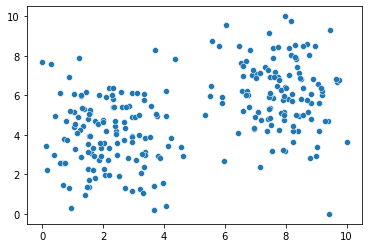

In [6]:
sns.scatterplot(d[:,0], d[:,1],legend=False)

In [7]:
from sklearn.cluster import KMeans

In [8]:
X=d[:,np.arange(2)]

In [9]:
X.shape

(250, 2)

#### Since it looks like there is two clusters, we will fit a 2-cluster model

In [10]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [11]:
kmeans.cluster_centers_

array([[7.74723088, 6.12677252],
       [2.16588884, 3.92178073]])

In [12]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

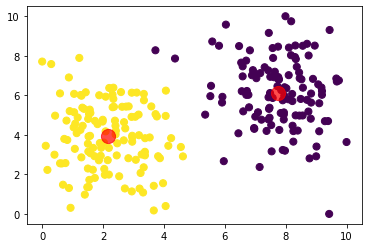

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)

#### Lets explicitly give initial centroid centers and only loop the kmeans algorithim one time

/Users/erickthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


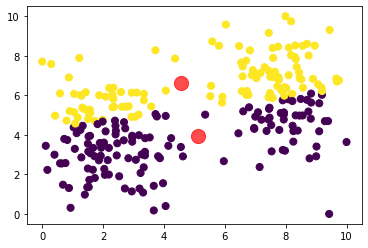

In [14]:
kmeans = KMeans(n_clusters=2, init=np.array([[ 3.37548103,  3.14213765],[ 2.20353872,  6.37112557]]), random_state=0, max_iter=1).fit(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)

#### The centroids didn't quite move to a good location

In [16]:
##  Suppress the warning seen above
import warnings
warnings.simplefilter("ignore")

#### Lets now try with 6 iterations

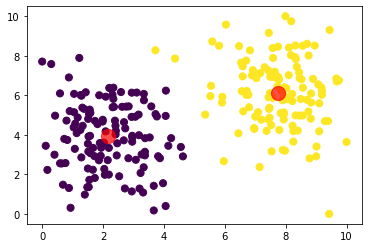

In [17]:
kmeans = KMeans(n_clusters=2, init=np.array([[ 3.37548103,  3.14213765],[ 2.20353872,  6.37112557]]), random_state=0, max_iter=6).fit(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)

#### Lets now find 3 clusters

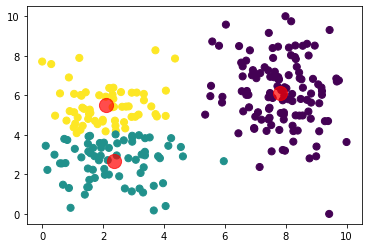

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0 ).fit(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)

#### data points are highly sensitive to inital centroids, lets choose different ones and visualize this

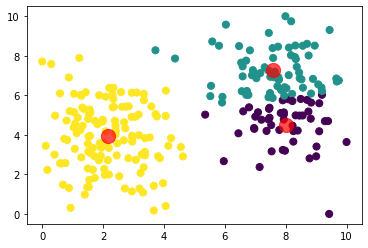

In [19]:
kmeans = KMeans(n_clusters=3, init=np.array([[ 3.37548103,  3.14213765],[ 2.20353872,  6.37112557], [0, 4]]),  random_state=0 ).fit(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)

#### Lets now look at 8 clusters 

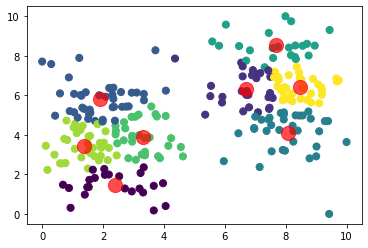

In [20]:
kmeans = KMeans(random_state=0 ).fit(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)